In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
source = 'images/source/s6.bmp'
target = 'images/target/t6.bmp'

In [3]:
def rgb2lab(img):
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]

    L = 0.3811 * R + 0.5783 * G + 0.0402 * B
    M = 0.1967 * R + 0.7244 * G + 0.0782 * B
    S = 0.0241 * R + 0.1288 * G + 0.8444 * B

    # np.clip() to avoid log(0) warning
    logL = np.log10(np.clip(L, 1e-12, None))
    logM = np.log10(np.clip(M, 1e-12, None))
    logS = np.log10(np.clip(S, 1e-12, None))
    
    l = (logL + logM + logS) / np.sqrt(3)
    a = (logL + logM - 2*logS) / np.sqrt(6)
    b = (logL - logM) / np.sqrt(2)
    
    # clip to ensure the results stay in lab value ranges
    l = np.clip(l, 0, 100)
    a = np.clip(a, -128, 127)
    b = np.clip(b, -128, 127)
    
    return np.stack([l, a, b], axis=2)

In [4]:
def lab2rgb(img):
    l = img[:, :, 0]
    a = img[:, :, 1]
    b = img[:, :, 2]
    
    l /= np.sqrt(3)
    a /= np.sqrt(6)
    b /= np.sqrt(2)
    
    logL = l + a + b
    logM = l + a - b
    logS = l - 2 * a
    
    L = 10**logL
    M = 10**logM
    S = 10**logS
    
    R = 4.4679 * L - 3.5873 * M + 0.1193 * S
    G = -1.2186 * L + 2.3809 * M - 0.1624 * S
    B = 0.0497 * L - 0.2439 * M + 1.2045 * S
    
    return np.clip(np.stack([R, G, B], axis=2), 0, 255).astype('uint8')

In [5]:
source_rgb = plt.imread(source)
target_rgb = plt.imread(target)

source_lab = rgb2lab(source_rgb)
target_lab = rgb2lab(target_rgb)

l_s, a_s, b_s = source_lab[:, :, 0], source_lab[:, :, 1], source_lab[:, :, 2]
l_t, a_t, b_t = target_lab[:, :, 0], target_lab[:, :, 1], target_lab[:, :, 2]

In [6]:
l = l_s - l_s.mean()
a = a_s - a_s.mean()
b = b_s - b_s.mean()

l = l_t.std() / l_s.std() * l
a = a_t.std() / a_s.std() * a
b = b_t.std() / b_s.std() * b

l += l_t.mean()
a += a_t.mean()
b += b_t.mean()

In [7]:
output_lab = np.stack([l, a, b], axis=2)
output_rgb = lab2rgb(output_lab)

Text(0.5, 1.0, 'Source')

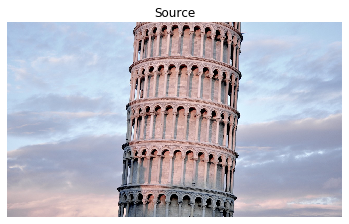

In [8]:
plt.axis('off')
plt.imshow(source_rgb)
plt.title('Source')

Text(0.5, 1.0, 'Target')

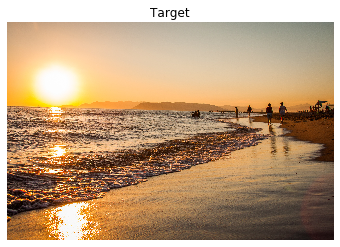

In [9]:
plt.axis('off')
plt.imshow(target_rgb)
plt.title('Target')

Text(0.5, 1.0, 'Output')

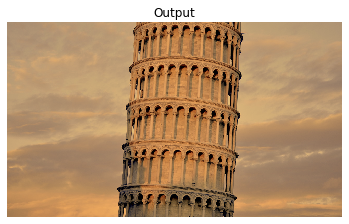

In [10]:
plt.axis('off')
plt.imshow(output_rgb)
plt.title('Output')

In [11]:
plt.imsave('output.png', output_rgb)